<a href="https://colab.research.google.com/github/AnoopmishraInfo/PRODIGY_ML_03/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.0FZ7CP_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Dataset prepared: (2000, 4096)
Training SVM model...
Accuracy: 0.66


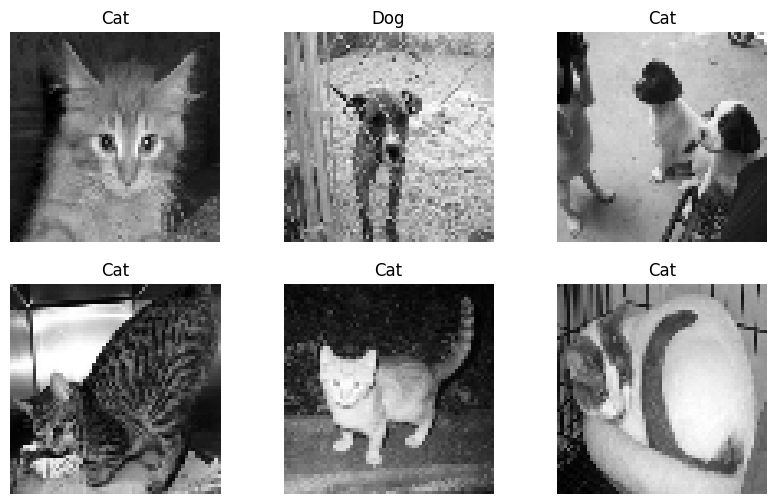

In [ ]:
#Implement a Support Vector Machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

!pip install tensorflow scikit-learn opencv-python

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

print("Downloading dataset automatically...")

# Load cats vs dogs dataset
dataset, info = tfds.load("cats_vs_dogs", with_info=True, as_supervised=True)

images = []
labels = []

IMG_SIZE = 64
LIMIT = 2000  # use 2000 images for speed

for img, label in tfds.as_numpy(dataset['train'].take(LIMIT)):
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.flatten()
    images.append(img)
    labels.append(label)

X = np.array(images) / 255.0
y = np.array(labels)

print("Dataset prepared:", X.shape)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training SVM model...")
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

# Show sample predictions
plt.figure(figsize=(10,6))

for i in range(6):
    img = X_test[i].reshape(64,64)
    pred = model.predict([X_test[i]])[0]

    plt.subplot(2,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.title("Dog" if pred==1 else "Cat")
    plt.axis("off")

plt.show()
